In [127]:
import pandas as pd

In [128]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [129]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711,166191,166924,167739,168550,169448,169940,170152,170604,171246,171422,171519,171673
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172,264624,264875,265716,266416,267020,267020,267551,268008,268304,268491,268940,269301
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598,257976,258478,259088,259673,260191,260723,261226,261752,262165,262570,262994,263369
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599,36599,36808,36808,36989,37074,37140,37140,37140,37277,37361,37452,37522
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351,98364,98409,98424,98453,98474,98501,98514,98514,98514,98555,98568,98585


In [130]:
last_date = confirmed.iloc[:,-1:].columns[0]

In [131]:
confirmed.set_index('Country/Region').head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,...,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711,166191,166924,167739,168550,169448,169940,170152,170604,171246,171422,171519,171673
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172,264624,264875,265716,266416,267020,267020,267551,268008,268304,268491,268940,269301
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598,257976,258478,259088,259673,260191,260723,261226,261752,262165,262570,262994,263369
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599,36599,36808,36808,36989,37074,37140,37140,37140,37277,37361,37452,37522
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351,98364,98409,98424,98453,98474,98501,98514,98514,98514,98555,98568,98585


In [132]:
# Não irei considerar a coluna 'Province/State', pois não está padronizado em todos os países.

confirmed['Country/Region'].value_counts()

China             34
Canada            16
United Kingdom    14
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 198, dtype: int64

In [133]:
confirmed_by_country = confirmed.groupby('Country/Region').sum()

In [134]:
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,...,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711,166191,166924,167739,168550,169448,169940,170152,170604,171246,171422,171519,171673
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172,264624,264875,265716,266416,267020,267020,267551,268008,268304,268491,268940,269301
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598,257976,258478,259088,259673,260191,260723,261226,261752,262165,262570,262994,263369
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599,36599,36808,36808,36989,37074,37140,37140,37140,37277,37361,37452,37522
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351,98364,98409,98424,98453,98474,98501,98514,98514,98514,98555,98568,98585


In [135]:
confirmed_by_country.loc['China'][2:]

1/22/20       548.0
1/23/20       643.0
1/24/20       920.0
1/25/20      1406.0
1/26/20      2075.0
             ...   
2/13/22    124139.0
2/14/22    125667.0
2/15/22    126374.0
2/16/22    127248.0
2/17/22    127796.0
Name: China, Length: 758, dtype: float64

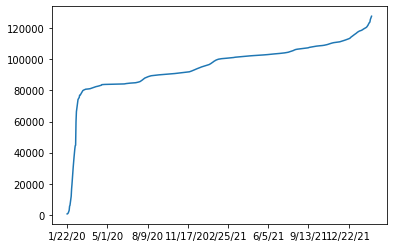

In [136]:
confirmed_by_country.loc['China'][2:].plot()

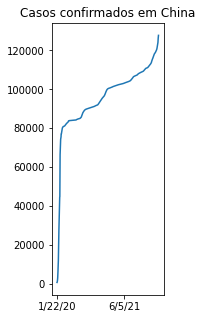

In [137]:
# Dimensões da figura estão longe do ideia, pois passam a mensagem de extremo crescimento devido ao achatamento do eixo horizontal.
import matplotlib.pyplot as plt

plt.figure(figsize = (2,5))
plt.title('Casos confirmados em China', fontsize=12)
confirmed_by_country.loc['China'][2:].plot()
plt.show()

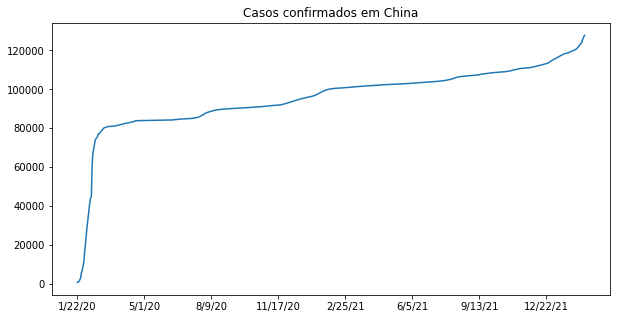

In [138]:
#Data visualization é fundamental, porisso devemos ter atenção aos dois eixos.

plt.figure(figsize = (10,5))
plt.title('Casos confirmados em China', fontsize=12)
confirmed_by_country.loc['China'][2:].plot()
plt.show()

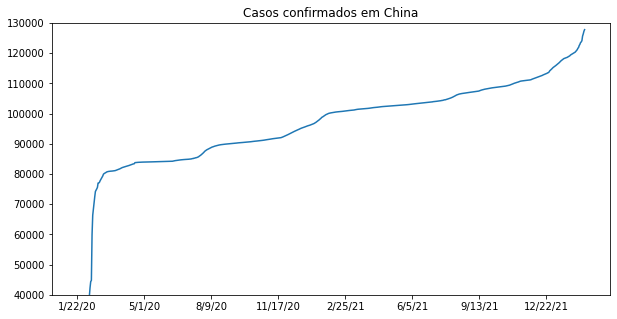

In [139]:
# Exemplo ruim de manipulação do eixo y
# Aqui passa a mensagem de que o crecimento é extremamente alto no início, pois o gráfico começa em 40000

plt.figure(figsize = (10,5))
plt.title('Casos confirmados em China', fontsize=12)
confirmed_by_country.loc['China'][2:].plot()
plt.ylim(40000,130000)
plt.show()

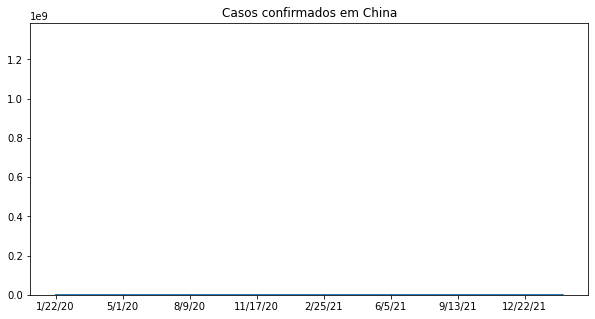

In [140]:
# Exemplo ruim de manipulação do eixo y
# Aqui colocamos como limite de y o valor da população da China
# Aqui passa a mensagem de que a doença não é grave
# Esse gráfico não possui nenhuma informação sobre a gravidade da doença

plt.figure(figsize = (10,5))
plt.title('Casos confirmados em China', fontsize=12)
confirmed_by_country.loc['China'][2:].plot()
plt.ylim(0,1386000000)
plt.show()

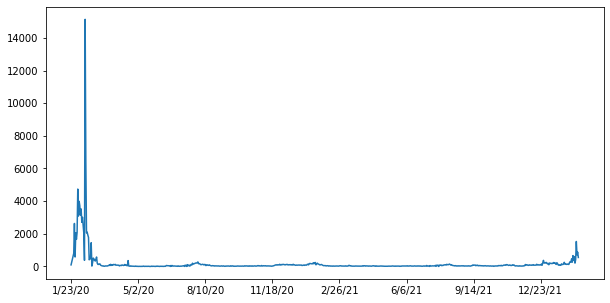

In [141]:
plt.figure(figsize = (10,5))
new_cases_mainland_china = confirmed_by_country.loc['China'][2:].diff().dropna()
new_cases_mainland_china.plot()

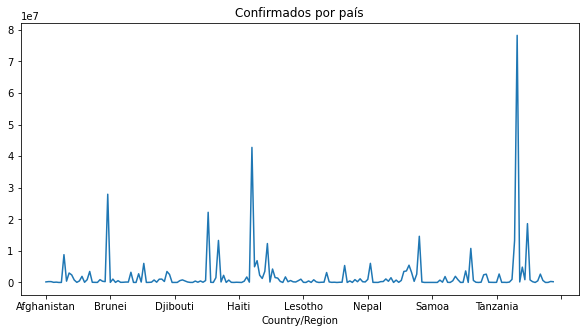

In [142]:
# Não faz sentido um gráfico de linha para variável catergórica
plt.figure(figsize = (10,5))
confirmed_by_country[last_date].plot()
plt.title('Confirmados por país')
plt.show()

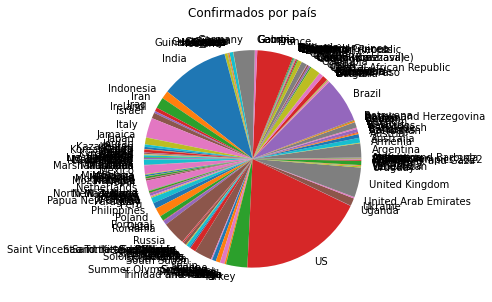

In [143]:
# 99.99% das vezes não é indicado usar o gráfico de torta/pizza.
# Não recomendado uso de gráficos com nome de comida :)

plt.figure(figsize = (10,5))
confirmed_by_country[last_date].plot(kind='pie')
plt.title('Confirmados por país')
plt.show()

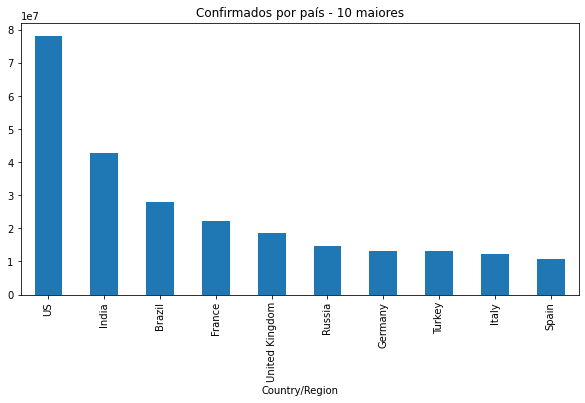

In [144]:
plt.figure(figsize = (10,5))
confirmed_by_country[last_date].sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Confirmados por país - 10 maiores')
plt.show()

# Lembrando que existe um vício, pois países que não testaram aparecerão com valores mais baixos que o real

In [145]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [146]:
display(deaths.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7373,7373,7374,7376,7376,7376,7378,7379,7381,7383,7386,7386,7390,7390,7393,7393,7397,7401,7403,7403,7405,7408,7414,7417,7418,7420,7420,7425,7432,7442,7454,7465,7477,7478,7488,7494,7501,7504,7513,7524
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3240,3241,3247,3253,3255,3262,3265,3269,3271,3277,3283,3286,3292,3297,3305,3305,3312,3317,3323,3329,3329,3334,3346,3346,3362,3362,3371,3371,3380,3387,3393,3399,3402,3402,3407,3410,3414,3420,3423,3430
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6339,6349,6363,6372,6383,6393,6404,6412,6423,6435,6443,6453,6468,6481,6495,6508,6516,6526,6539,6545,6555,6566,6579,6593,6604,6618,6631,6640,6646,6654,6667,6678,6690,6703,6715,6729,6744,6753,6762,6772
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,141,141,141,141,141,142,142,142,142,142,142,144,144,144,144,144,145,145,145,145,145,145,145,145,146,147,147,147,147,147,147,148,148,148,148,148,149,150,150,150
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1826,1832,1840,1842,1847,1852,1857,1863,1866,1870,1877,1881,1884,1886,1888,1888,1891,1892,1893,1893,1894,1895,1895,1895,1895,1896,1896,1896,1896,1896,1896,1896,1897,1898,1898,1898,1898,1899,1899,1899


In [147]:
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [148]:
def latest_by_country(data):
  return data.groupby('Country/Region').sum().iloc[:,-1:]
latest_by_country(confirmed).head()

,2/17/22
Country/Region,
Afghanistan,171673
Albania,269301
Algeria,263369
Andorra,37522
Angola,98585


In [149]:
information = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]


In [150]:
combined = pd.concat(information, axis=1)
combined.columns = ['confirmed', 'deaths', 'recovered']
combined.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,171673,7524,0
Albania,269301,3430,0
Algeria,263369,6772,0
Andorra,37522,150,0
Angola,98585,1899,0


In [151]:
# taxa de letalidade é expressa em %
# o número de casos letais dentro dos casos que foram letais e não letais

# é muito difícil falar de letalidade durante uma pandemia

In [161]:
letalidade_global_1 = 100 * combined.deaths.sum() / combined.confirmed.sum()
letalidade_global_2 = 100 * combined.deaths.sum() / (combined.deaths.sum() + combined.recovered.sum())
print(letalidade_global_1)
print(letalidade_global_2)

1.396999505757662
100.0


In [160]:
combined['letality_rate_1(%)'] = 100 * combined.deaths / combined.confirmed
combined['letality_rate_2(%)'] = 100 * combined.deaths / (combined.deaths + combined.recovered)
combined.sort_values('letality_rate_1(%)', ascending=False)

,confirmed,deaths,recovered,letality_rate_1(%),letality_rate_2(%)
Country/Region,,,,,
MS Zaandam,9,2,0,22.222222,100.0
Yemen,11718,2114,0,18.040621,100.0
Vanuatu,7,1,0,14.285714,100.0
Sudan,59939,3831,0,6.391498,100.0
Peru,3474965,208964,0,6.013413,100.0
...,...,...,...,...,...
Summer Olympics 2020,865,0,0,0.000000,NaN
Winter Olympics 2022,507,0,0,0.000000,NaN
Holy See,29,0,0,0.000000,NaN


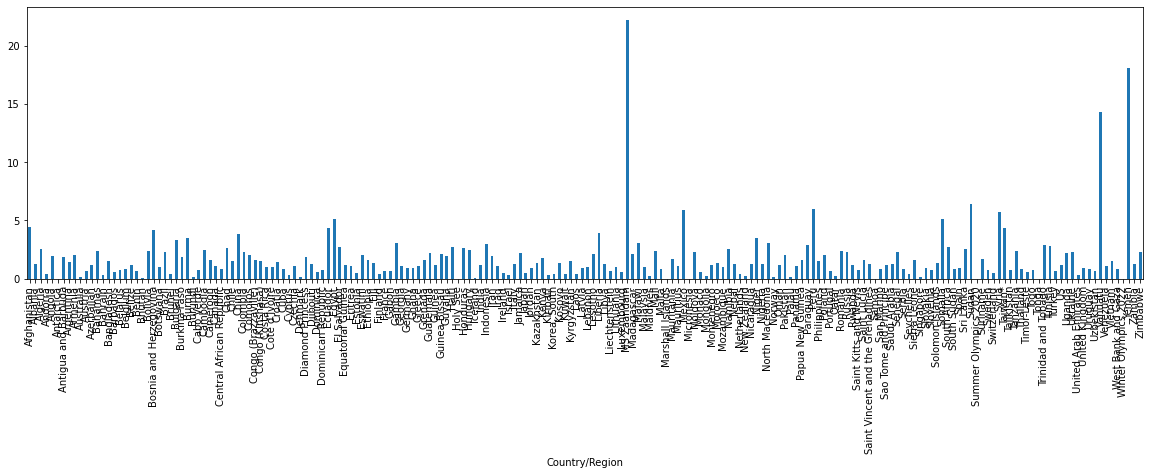

In [158]:
plt.figure(figsize=(20,5))
combined['letality_rate_1(%)'].plot(kind='bar')
plt.show()

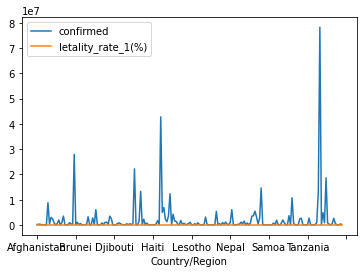

In [170]:
# Visualização ruim

combined[['confirmed', 'letality_rate_1(%)']].plot()
plt.show()

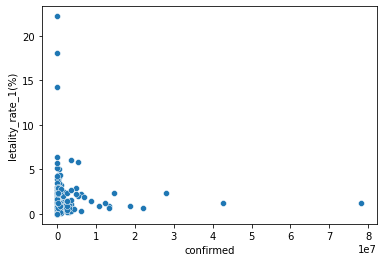

In [171]:
import seaborn as sns

sns.scatterplot(data = combined, x = 'confirmed', y = 'letality_rate_1(%)')

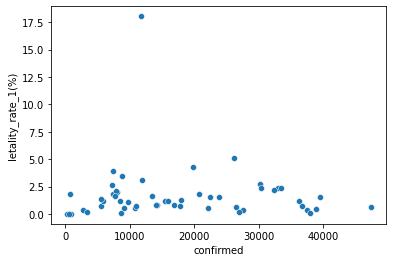

In [175]:
sns.scatterplot(data = combined.query('confirmed > 40 and confirmed < 50000'), x = 'confirmed', y = 'letality_rate_1(%)')

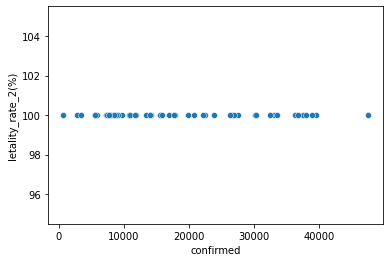

In [176]:
sns.scatterplot(data = combined.query('confirmed > 40 and confirmed < 50000'), x = 'confirmed', y = 'letality_rate_2(%)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


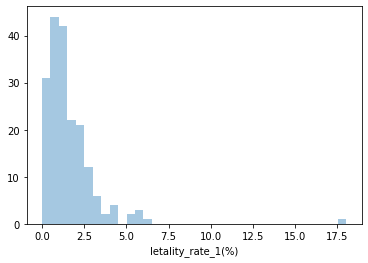

In [180]:
sns.distplot(combined.query('confirmed > 40')['letality_rate_1(%)'], kde=False)

In [187]:
combined.sort_values('letality_rate_1(%)', ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1(%),letality_rate_2(%)
Country/Region,,,,,
MS Zaandam,9,2,0,22.222222,100.0
Yemen,11718,2114,0,18.040621,100.0
Vanuatu,7,1,0,14.285714,100.0
Sudan,59939,3831,0,6.391498,100.0
Peru,3474965,208964,0,6.013413,100.0
Mexico,5366405,314598,0,5.862360,100.0
Syria,53278,3041,0,5.707797,100.0
Somalia,26260,1345,0,5.121858,100.0
Egypt,463370,23580,0,5.088806,100.0


In [188]:
def latest_by_country_at(data, date):
  return data.groupby("Country/Region").sum()[date]


informations = [latest_by_country_at(confirmed, '2/20/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(informations, axis=1)
combined_2_20_20.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_2_20_20.sum()
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.9496280162177055
11.003964951784228


In [190]:
informations = [latest_by_country_at(confirmed, '2/8/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_12 = pd.concat(informations, axis=1)
combined_12.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_12.loc["China"]
letality_rate_3 = sum_up["deaths"] / sum_up["confirmed"]
print(letality_rate_3 * 100)
display(sum_up)

6.079208996577389


confirmed    36814
deaths        2238
recovered    18014
Name: China, dtype: int64